<a href="https://www.kaggle.com/code/adamdandi/game-user-behavior-analysis-in-editing-platform?scriptVersionId=221952831" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

In today's digital landscape, understanding user engagement and conversion metrics is vital for any platform aiming to optimize user experience and increase monetization. The Eklipse platform, which allows users to upload game sessions, generate and share clips, and access premium features, provides a rich dataset that can offer insights into user behavior. This analysis aims to explore the differences in behavior between Free and Premium users, assess the engagement with specific games, and provide actionable recommendations for encouraging Free users to convert to Premium. By leveraging the available datasets, this analysis will assist the Operations division and Executive management in making data-driven decisions.

# Dataset Overview
The datasets provided represent various aspects of user activity on the Eklipse platform. Each dataset captures different forms of engagement, including session uploads, clip creation, and premium subscriptions. Below is an overview of the key datasets:

### Clips Dataset:


* Purpose: Contains information about the clips generated by the platform, either automatically or by user editing.
* Columns: Includes columns such as user_id, gamesession_Id, clip_type_id, duration, event_name, game_name, and timestamps (created_at, join_at).
* Insights: This dataset will help in analyzing the types of clips most frequently generated by users and the engagement level with these clips.


### Downloaded Clips Dataset:

* Purpose: Tracks which clips were downloaded by users.
* Columns: Includes user_id, clip_id, gamesession_Id, and timestamps (created_at, join_at).
* Insights: Useful for understanding which clips attract the most attention from users, providing insights into user preferences.

### Gamesession Dataset:

* Purpose: Contains details about the game sessions uploaded by users.
* Columns: Includes user_id, duration, game_name, submited_date, and timestamps (created_at, join_at).
* Insights: This dataset is essential for understanding user activity levels and the most popular games on the platform.

### Premium Users Dataset:

* Purpose: Details the users who have subscribed to the Premium plan.
* Columns: Includes user_id, starts_at, ends_at, created_at, updated_at, canceled_at, and join_at.
* Insights: This dataset will help to segment Premium users and analyze their engagement compared to Free users.

### Shared Clips Dataset:

* Purpose: Tracks clips that users have shared or scheduled for sharing.
* Columns: Includes user_id, clip_id, gamesession_Id, game_name, event_name, and timestamps (created_at, scheduled_at, join_at).
* Insights: This dataset helps to understand the sharing behavior of users, a key aspect of user engagement.

# Task Breakdown

### Data Cleaning and Preparation

* Clean and preprocess the data (handle missing values, convert date columns, remove irrelevant columns, and remove duplicated rows).

### User Behavior Analysis

* Understand and highlight the behavioral differences between Free users and Premium users.
* Provide suggestions on how to encourage Free users to become Premium users.

### Game Engagement Analysis

* Offer suggestions on whether the company should focus on some specific games.
* Explain the reasons behind your suggestions, supported by relevant data.

## 1. Data Cleaning and Preparation

In [1]:
# import necessary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load datasets
clips = pd.read_csv ('/kaggle/input/eklipse/clips.csv')
downloaded_clips = pd.read_csv ('/kaggle/input/eklipse/downloaded_clips.csv')
gamesession = pd.read_csv ('/kaggle/input/eklipse/gamesession.csv')
premium_users = pd.read_csv ('/kaggle/input/eklipse/premium_users.csv')
shared_clips = pd.read_csv ('/kaggle/input/eklipse/shared_clips.csv')


# display basic information about the DataFrame
datasets = [clips, downloaded_clips, gamesession, premium_users, shared_clips]
for dataset in datasets:
    print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552031 entries, 0 to 552030
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      552031 non-null  int64  
 1   id              552031 non-null  int64  
 2   user_id         552031 non-null  int64  
 3   gamesession_Id  539270 non-null  float64
 4   clip_type_id    552031 non-null  int64  
 5   duration        552031 non-null  int64  
 6   event_name      530307 non-null  object 
 7   game_name       539270 non-null  object 
 8   created_at      552031 non-null  object 
 9   join_at         552031 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 42.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12938 entries, 0 to 12937
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      12938 non-null  int64  
 1   id              12938

In [3]:
# Rename the 'user_Id' field in downloaded_clips to 'user_id'
downloaded_clips.rename(columns={'user_Id': 'user_id'}, inplace=True)

In [4]:
# convert data type
clips['created_at'] = pd.to_datetime(clips['created_at'])
clips['join_at'] = pd.to_datetime(clips['join_at'])

downloaded_clips['created_at'] = pd.to_datetime(downloaded_clips['created_at'])
downloaded_clips['join_at'] = pd.to_datetime(downloaded_clips['join_at'])

gamesession['submited_date'] = pd.to_datetime(gamesession['submited_date'])
gamesession['created_at'] = pd.to_datetime(gamesession['created_at'])
gamesession['join_at'] = pd.to_datetime(gamesession['join_at'])

premium_users['starts_at'] = pd.to_datetime(premium_users['starts_at'])
premium_users['ends_at'] = pd.to_datetime(premium_users['ends_at'])
premium_users['created_at'] = pd.to_datetime(premium_users['created_at'])
premium_users['updated_at'] = pd.to_datetime(premium_users['updated_at'])
premium_users['join_at'] = pd.to_datetime(premium_users['join_at'])
premium_users['canceled_at'] = pd.to_datetime(premium_users['canceled_at'], errors='coerce')  # Menangani NaN dengan 'coerce'

shared_clips['created_at'] = pd.to_datetime(shared_clips['created_at'])
shared_clips['scheduled_at'] = pd.to_datetime(shared_clips['scheduled_at'])
shared_clips['join_at'] = pd.to_datetime(shared_clips['join_at'])

# check data type
datasets = [clips, downloaded_clips, gamesession, premium_users, shared_clips]
for dataset in datasets:
    print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552031 entries, 0 to 552030
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Unnamed: 0      552031 non-null  int64         
 1   id              552031 non-null  int64         
 2   user_id         552031 non-null  int64         
 3   gamesession_Id  539270 non-null  float64       
 4   clip_type_id    552031 non-null  int64         
 5   duration        552031 non-null  int64         
 6   event_name      530307 non-null  object        
 7   game_name       539270 non-null  object        
 8   created_at      552031 non-null  datetime64[ns]
 9   join_at         552031 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(5), object(2)
memory usage: 42.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12938 entries, 0 to 12937
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  -

In [5]:
# drop irrelevant columns
irrelevant_columns = ['Unnamed: 0']

clips.drop(columns=irrelevant_columns, inplace=True)
downloaded_clips.drop(columns=irrelevant_columns, inplace=True)
gamesession.drop(columns=irrelevant_columns, inplace=True)
premium_users.drop(columns=irrelevant_columns, inplace=True)
shared_clips.drop(columns=irrelevant_columns, inplace=True)

# check deleted columns
datasets = [clips, downloaded_clips, gamesession, premium_users, shared_clips]
for dataset in datasets:
    print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552031 entries, 0 to 552030
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              552031 non-null  int64         
 1   user_id         552031 non-null  int64         
 2   gamesession_Id  539270 non-null  float64       
 3   clip_type_id    552031 non-null  int64         
 4   duration        552031 non-null  int64         
 5   event_name      530307 non-null  object        
 6   game_name       539270 non-null  object        
 7   created_at      552031 non-null  datetime64[ns]
 8   join_at         552031 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(4), object(2)
memory usage: 37.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12938 entries, 0 to 12937
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id 

In [6]:
# check for the null values in each column
datasets = [clips, downloaded_clips, gamesession, premium_users, shared_clips]
dataset_names = ["clips", "downloaded_clips", "gamesession", "premium_users", "shared_clips"]

for name, dataset in zip(dataset_names, datasets):
    print(f"Null values in {name}:")
    print(dataset.isnull().sum())
    print("-" * 50)  # optional: to separate output for better readability

Null values in clips:
id                    0
user_id               0
gamesession_Id    12761
clip_type_id          0
duration              0
event_name        21724
game_name         12761
created_at            0
join_at               0
dtype: int64
--------------------------------------------------
Null values in downloaded_clips:
id                   0
user_id              0
clip_id              0
gamesession_Id       0
game_name            0
event_name        4019
created_at           0
join_at              0
dtype: int64
--------------------------------------------------
Null values in gamesession:
id                0
user_id           0
duration          0
submited_date     0
created_at        0
game_name        29
join_at           0
dtype: int64
--------------------------------------------------
Null values in premium_users:
user_id          0
starts_at        0
ends_at          0
created_at       0
updated_at       0
canceled_at    259
join_at          0
dtype: int64
---------

**Conclusion**
* Fillna are recommended for fields with a small percentage of blank values (such as gamesession_Id, event_name, game_name, etc.). This is because the missing data is not significant for analysis and filling with default values such as 'Unknown' or 0 will not affect the results greatly.

* Deletion can be considered if blank values cover more than 30-40% of the dataset and severely affect the relationship between data (such as in premium_users with blank values in cancelled_at). However, since most blank values in this column indicate that the subscription is still active, it is better to fill it with NaT.

In [7]:
#replacing all NaN values
clips['gamesession_Id'] = clips['gamesession_Id'].fillna(0) #edited clips
clips['event_name'] = clips['event_name'].fillna('Unknown')
clips['game_name'] = clips['game_name'].fillna('Unknown')

downloaded_clips['event_name'] = downloaded_clips['event_name'].fillna('Unknown')

gamesession['game_name'] = gamesession['game_name'].fillna('Unknown')

premium_users['canceled_at'] = premium_users['canceled_at'].fillna(pd.NaT)

shared_clips['event_name'] = shared_clips['event_name'].fillna('Unknown')



#examing changes
datasets = [clips, downloaded_clips, gamesession, premium_users, shared_clips]
for dataset in datasets:
    print(dataset.isnull().sum())

id                0
user_id           0
gamesession_Id    0
clip_type_id      0
duration          0
event_name        0
game_name         0
created_at        0
join_at           0
dtype: int64
id                0
user_id           0
clip_id           0
gamesession_Id    0
game_name         0
event_name        0
created_at        0
join_at           0
dtype: int64
id               0
user_id          0
duration         0
submited_date    0
created_at       0
game_name        0
join_at          0
dtype: int64
user_id          0
starts_at        0
ends_at          0
created_at       0
updated_at       0
canceled_at    259
join_at          0
dtype: int64
user_id           0
clip_id           0
gamesession_Id    0
game_name         0
event_name        0
created_at        0
scheduled_at      0
join_at           0
dtype: int64


**NaT** in the canceled_at column means that the subscription has not been cancelled by the user, and their subscription is still active.

In [8]:
# check duplicated
datasets = [clips, downloaded_clips, gamesession, premium_users, shared_clips]
for dataset in datasets:
    duplicates = dataset[dataset.duplicated(keep=False)]
    print(f'Number of duplicated rows: {len(duplicates)}')
    print(duplicates)

Number of duplicated rows: 0
Empty DataFrame
Columns: [id, user_id, gamesession_Id, clip_type_id, duration, event_name, game_name, created_at, join_at]
Index: []
Number of duplicated rows: 0
Empty DataFrame
Columns: [id, user_id, clip_id, gamesession_Id, game_name, event_name, created_at, join_at]
Index: []
Number of duplicated rows: 0
Empty DataFrame
Columns: [id, user_id, duration, submited_date, created_at, game_name, join_at]
Index: []
Number of duplicated rows: 0
Empty DataFrame
Columns: [user_id, starts_at, ends_at, created_at, updated_at, canceled_at, join_at]
Index: []
Number of duplicated rows: 3590
      user_id       clip_id  gamesession_Id     game_name event_name  \
4     4481295  133924026570     101171965.0   Other Games    Unknown   
5     4481295  133924026570     101171965.0   Other Games    Unknown   
6     4481295  133925183555     101171965.0   Other Games    Unknown   
7     4481295  133925183555     101171965.0   Other Games    Unknown   
13    5388565  134778735

In [9]:
# delete duplicates based on specific columns: 'user_id', 'clip_id', 'gamesession_Id'
shared_clips.drop_duplicates(subset=['user_id', 'clip_id', 'gamesession_Id'], inplace=True)

# check if duplicates are removed
print(f'Rows after removing duplicates: {shared_clips.shape[0]}')

Rows after removing duplicates: 2977


* subset=['user_id', 'clip_id', 'gamesession_Id']: This will remove rows that have duplicate combinations in those columns, but keep one row of the same combination.
* inplace=True: Make changes directly to the dataset without the need to create a new copy.

# 2.  Data Analysis User Behavior Analysis

* Understand and highlight the behavioral differences between Free users and Premium users.
* Provide suggestions on how to encourage Free users to become Premium users.


In [10]:
# merge all relevant data

## merge premium data with clips, downloaded, and shared
user_data = pd.merge(clips, premium_users[['user_id', 'starts_at', 'ends_at']], on='user_id', how='left')
user_data['is_premium'] = np.where(user_data['starts_at'].notna(), 1, 0)  # Flag Premium Users

## merge with download and share data
downloaded_data = pd.merge(downloaded_clips, premium_users[['user_id']], on='user_id', how='left')
shared_data = pd.merge(shared_clips, premium_users[['user_id']], on='user_id', how='left')

## add premium status to downloads and shares
downloaded_data['is_premium'] = np.where(downloaded_data['user_id'].isin(premium_users[premium_users['starts_at'].notna()]['user_id']), 1, 0)
shared_data['is_premium'] = np.where(shared_data['user_id'].isin(premium_users[premium_users['starts_at'].notna()]['user_id']), 1, 0)

# check all columns after merging
print(user_data.info())
print(downloaded_data.info())
print(shared_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574978 entries, 0 to 574977
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              574978 non-null  int64         
 1   user_id         574978 non-null  int64         
 2   gamesession_Id  574978 non-null  float64       
 3   clip_type_id    574978 non-null  int64         
 4   duration        574978 non-null  int64         
 5   event_name      574978 non-null  object        
 6   game_name       574978 non-null  object        
 7   created_at      574978 non-null  datetime64[ns]
 8   join_at         574978 non-null  datetime64[ns]
 9   starts_at       213587 non-null  datetime64[ns]
 10  ends_at         213587 non-null  datetime64[ns]
 11  is_premium      574978 non-null  int64         
dtypes: datetime64[ns](4), float64(1), int64(5), object(2)
memory usage: 52.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13616 entr

In [11]:
# set the metrics
## Metric 1: Gamesession duration by Premium status
game_duration = user_data.groupby('is_premium')['duration'].sum()
# Convert duration from seconds to hours (integer, no decimals)
game_duration_in_hours = game_duration // 3600

## Metric 2: Download Frequency and Clip Shares
downloads_per_user = downloaded_data.groupby('is_premium').size()
shares_per_user = shared_data.groupby('is_premium').size()

# Metric 3: Types of Clips Created by Premium Status
clip_type_counts = user_data.groupby(['is_premium', 'clip_type_id']).size().reset_index(name='clip_count')

# Calculating the average clip duration and total number of clips created by premium status and type
average_clip_duration = user_data.groupby(['is_premium', 'clip_type_id'])['duration'].mean().reset_index(name='avg_duration')

# show results
print("Total Duration Gamesession in Hours (Free vs Premium):")
print(game_duration_in_hours)
print("Download Frequency per User (Free vs Premium):")
print(downloads_per_user)
print("Frequency of Sharing per User (Free vs Premium):")
print(shares_per_user)
print("Number of Clips by Type (Free vs Premium):")
print(clip_type_counts)
print("Average Clip Duration per Type (Seconds):")
print(average_clip_duration)

Total Duration Gamesession in Hours (Free vs Premium):
is_premium
0    6132
1    2851
Name: duration, dtype: int64
Download Frequency per User (Free vs Premium):
is_premium
0    8451
1    5165
dtype: int64
Frequency of Sharing per User (Free vs Premium):
is_premium
0    1421
1    1796
dtype: int64
Number of Clips by Type (Free vs Premium):
    is_premium  clip_type_id  clip_count
0            0            -1           1
1            0             1      332899
2            0             2       14537
3            0             3         776
4            0             5        8067
5            0             6         113
6            0             7           8
7            0             8        4990
8            1             1      200943
9            1             2        8220
10           1             3         302
11           1             5        3736
12           1             6         120
13           1             7           1
14           1             8         265
Av

In [12]:
# checks for rows with negative clip_type_id
negative_clip_types = user_data[user_data['clip_type_id'] < 0]
print(negative_clip_types)

# check based user_id, duration, event_name, and game_name
filtered_data = user_data[(user_data['user_id'] == 14329861) & (user_data['event_name'] == 'highlights')]
print(filtered_data)

                  id   user_id  gamesession_Id  clip_type_id  duration  \
568183  197390353330  14329861     226477161.0            -1        35   

        event_name game_name          created_at             join_at  \
568183  highlights   Podcast 2023-12-15 08:48:14 2023-12-14 18:32:48   

       starts_at ends_at  is_premium  
568183       NaT     NaT           0  
                  id   user_id  gamesession_Id  clip_type_id  duration  \
567906  197361537415  14329861     226477161.0             1        35   
567908  197361615065  14329861     226477161.0             1        43   
567910  197361692715  14329861     226477161.0             1        39   
567911  197361739305  14329861     226477161.0             1        30   
567913  197361801425  14329861     226477161.0             1        34   
567916  197361886840  14329861     226477161.0             1        26   
567918  197361948960  14329861     226477161.0             1        25   
567921  197362018845  14329861     2

After we checked by matching the user_id and event_name, it can be concluded that there is a typo that should be 1, not -1. make an interpretation of this and treatment

In [13]:
# Fix invalid clip_type_id
user_data['clip_type_id'] = user_data['clip_type_id'].replace(-1, 1)

# run analysis again
game_duration = user_data.groupby('is_premium')['duration'].sum()
game_duration_in_hours = game_duration // 3600
downloads_per_user = downloaded_data.groupby('is_premium').size()
shares_per_user = shared_data.groupby('is_premium').size()
clip_type_counts = user_data.groupby(['is_premium', 'clip_type_id']).size().reset_index(name='clip_count')
average_clip_duration = user_data.groupby(['is_premium', 'clip_type_id'])['duration'].mean().reset_index(name='avg_duration')

# show results
print("Total Duration Gamesession in Hours (Free vs Premium):")
print(game_duration_in_hours)
print("Download Frequency per User (Free vs Premium):")
print(downloads_per_user)
print("Frequency of Sharing per User (Free vs Premium):")
print(shares_per_user)
print("Number of Clips by Type (Free vs Premium):")
print(clip_type_counts)
print("Average Clip Duration per Type (Seconds):")
print(average_clip_duration)

Total Duration Gamesession in Hours (Free vs Premium):
is_premium
0    6132
1    2851
Name: duration, dtype: int64
Download Frequency per User (Free vs Premium):
is_premium
0    8451
1    5165
dtype: int64
Frequency of Sharing per User (Free vs Premium):
is_premium
0    1421
1    1796
dtype: int64
Number of Clips by Type (Free vs Premium):
    is_premium  clip_type_id  clip_count
0            0             1      332900
1            0             2       14537
2            0             3         776
3            0             5        8067
4            0             6         113
5            0             7           8
6            0             8        4990
7            1             1      200943
8            1             2        8220
9            1             3         302
10           1             5        3736
11           1             6         120
12           1             7           1
13           1             8         265
Average Clip Duration per Type (Seconds):
 

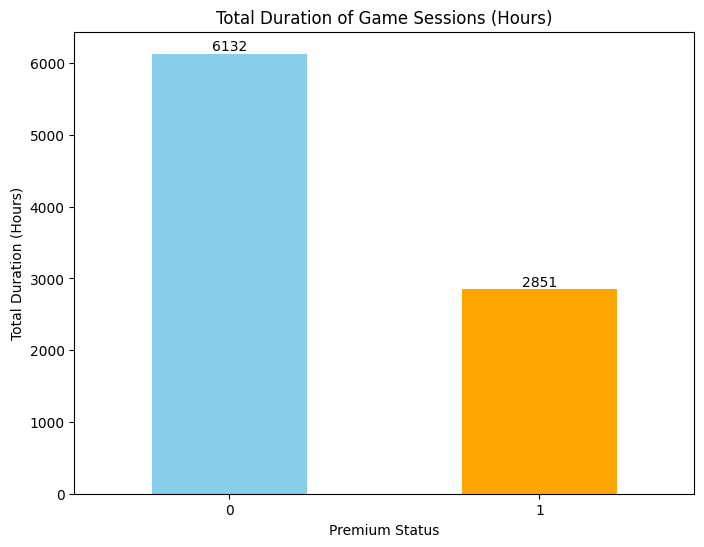

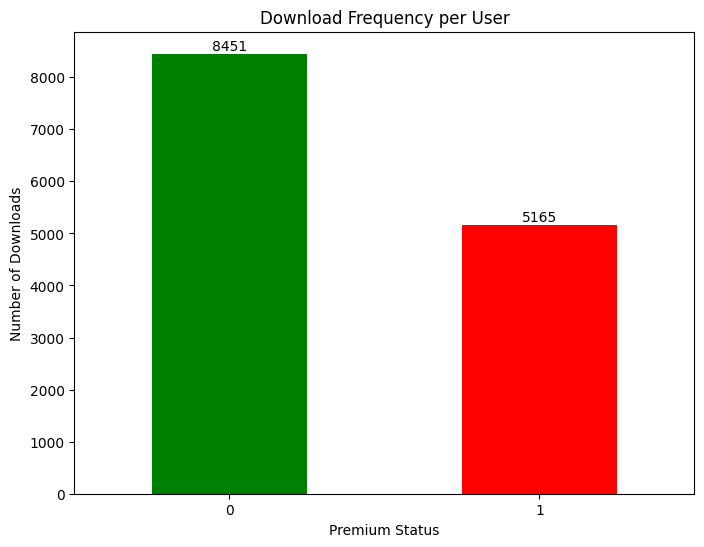

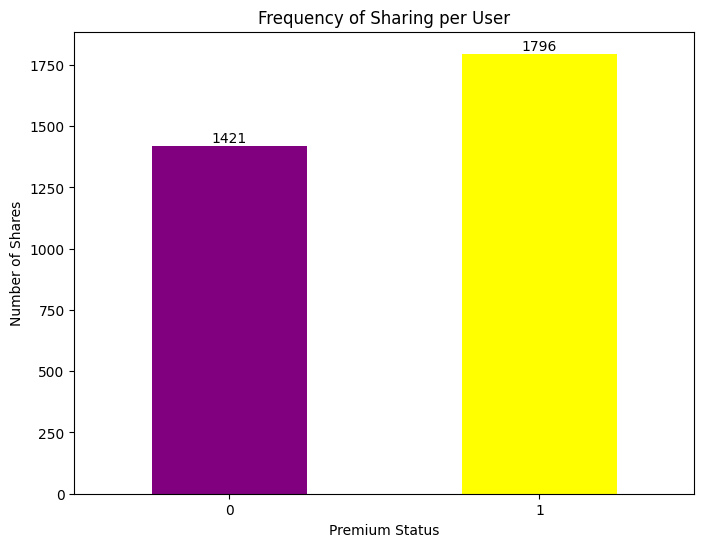

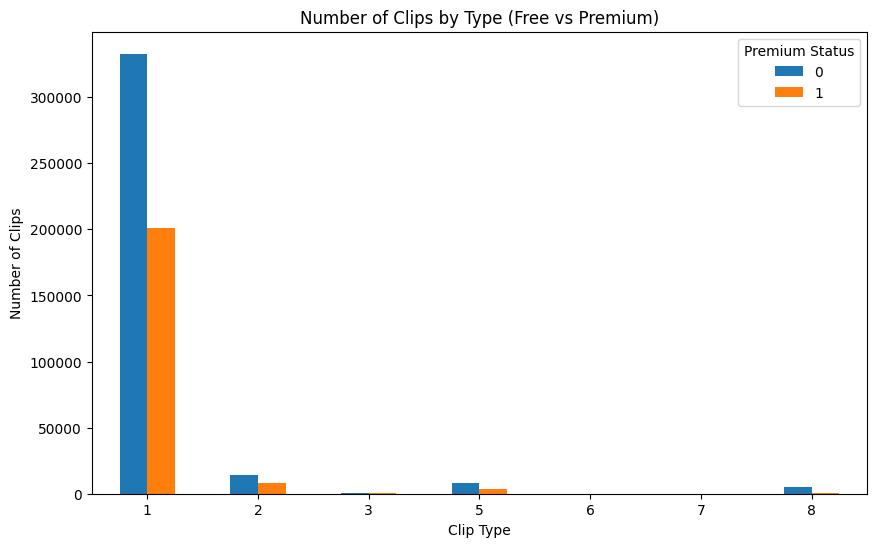

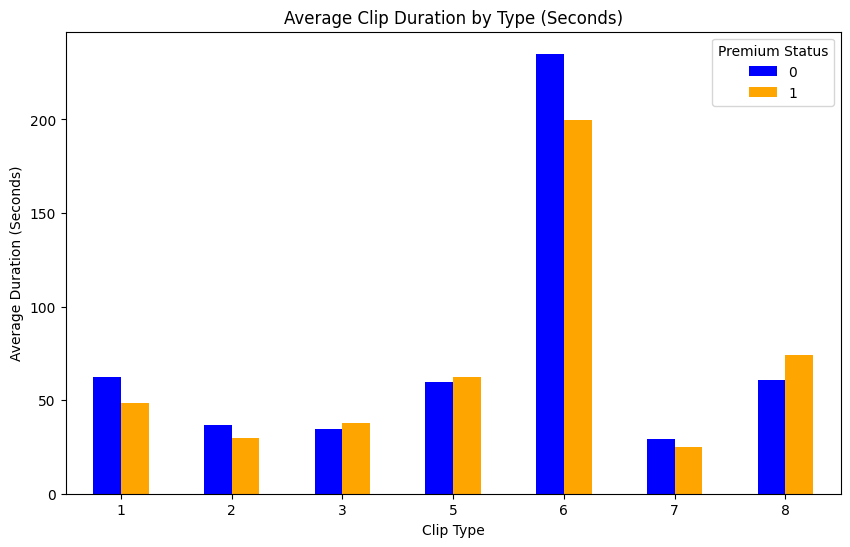

In [14]:
# Visualization: Total Duration of Game Sessions
game_duration_in_hours.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'orange'])
plt.title("Total Duration of Game Sessions (Hours)")
plt.xlabel("Premium Status")
plt.ylabel("Total Duration (Hours)")
plt.xticks(rotation=0)
for index, value in enumerate(game_duration_in_hours):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

# Visualization: Download Frequency per User
downloads_per_user.plot(kind='bar', figsize=(8, 6), color=['green', 'red'])
plt.title("Download Frequency per User")
plt.xlabel("Premium Status")
plt.ylabel("Number of Downloads")
plt.xticks(rotation=0)
for index, value in enumerate(downloads_per_user):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

# Visualization: Frequency of Sharing per User
shares_per_user.plot(kind='bar', figsize=(8, 6), color=['purple', 'yellow'])
plt.title("Frequency of Sharing per User")
plt.xlabel("Premium Status")
plt.ylabel("Number of Shares")
plt.xticks(rotation=0)
for index, value in enumerate(shares_per_user):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

# Visualization: Number of Clips by Type
clip_type_counts.pivot(index='clip_type_id', columns='is_premium', values='clip_count').plot(kind='bar', figsize=(10, 6))
plt.title("Number of Clips by Type (Free vs Premium)")
plt.xlabel("Clip Type")
plt.ylabel("Number of Clips")
plt.xticks(rotation=0)
plt.legend(title="Premium Status")
plt.show()

# Visualization: Average Clip Duration per Type
average_clip_duration.pivot(index='clip_type_id', columns='is_premium', values='avg_duration').plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])
plt.title("Average Clip Duration by Type (Seconds)")
plt.xlabel("Clip Type")
plt.ylabel("Average Duration (Seconds)")
plt.xticks(rotation=0)
plt.legend(title="Premium Status")
plt.show()

### **Suggestions to Encourage Free Users to Become Premium Users**

Based on your data analysis results, there are clear behavioral differences between Free and Premium users. Here are tailored suggestions that align with the findings and focus on motivating Free users to upgrade:

### **1. Highlight Value Through Features**
#### Insights:
- **Gamesession Duration**: Free users collectively have a higher total gamesession duration (6132 hours) than Premium users (2851 hours), indicating high engagement.
- **Download Frequency**: Free users download more clips (8451) compared to Premium users (5165), but their activity is likely limited by the lifetime credit cap.

#### Suggestions:
- **Promote Unlimited Usage**:
  - Use targeted campaigns like: “Are your 3 lifetime credits holding you back? Unlock unlimited downloads with Premium!”
- **Time-Limited Offers**:
  - Offer a 7-day free trial of Premium to high-duration Free users to demonstrate the benefits of extended stream duration and faster processing times.

### **2. Maximize Sharing Behavior**
#### Insights:
- Premium users share clips more frequently (1796 vs. 1421 for Free users), despite having fewer total downloads. This shows that Premium users are leveraging the sharing tools available.

#### Suggestions:
- **Introduce Sharing Rewards**:
  - Incentivize Free users to share clips by providing bonus credits or limited-time Premium access for reaching sharing milestones (e.g., 5 shares = 1-day trial).
- **Promote Advanced Sharing Tools**:
  - Highlight the benefits of scheduled posts and multi-platform sharing. For example: “Save time and reach more viewers—unlock multi-platform sharing with Premium!”

### **3. Drive Engagement Through Clip Types**
#### Insights:
- Free users generate significantly more clips overall (e.g., 332,900 for clip type 1) but lack access to advanced types like montage clips (type 6) and vertical clips optimized for TikTok (type 2 and 8).
- Average clip duration for Free users is slightly longer for montage clips (type 6) compared to Premium (235.1 vs. 199.9 seconds), showing high interest in this feature despite limited access.

#### Suggestions:
- **Showcase Advanced Clip Types**:
  - Use campaigns such as: “Want to create professional-quality montages or TikTok-ready clips? Upgrade to Premium!”


### **4. Optimize Based on Clip Duration**
#### Insights:
- For most clip types, Premium users have shorter average durations (e.g., type 1: 48.4 vs. 62.1 seconds for Free users), possibly indicating more efficient usage of advanced editing features like trimming.
- However, Premium users produce longer vertical clips (type 8: 73.9 vs. 60.7 seconds), which could be linked to better-quality content or features like high-quality exports.

#### Suggestions:
- **Emphasize Editing Efficiency**:
  - Promote Premium editing features like trimming, AI editing, and watermark-free exports with messages like: “Produce high-quality, professional clips in less time!”
- **Quality Comparisons**:
  - Showcase side-by-side comparisons of 720p (Free) vs. 1080p (Premium) vertical clips to highlight quality differences.

### **5. Use Data-Driven Personalization**
#### Insights:
- Free users are highly active in downloading and creating clips but are constrained by platform limitations.
- Many Free users seem to engage in behaviors indicative of future Premium needs, such as higher gamesession durations or clip-sharing frequency.

#### Suggestions:
- **Behavior-Based Targeting**:
  - Identify Free users with:
    - High gamesession durations.
    - High download activity nearing the 3-credit cap.
    - Frequent clip sharing or creation.
  - Offer personalized promotions like: “You’re among our top creators! Unlock Premium today for exclusive benefits.”
- **Tiered Upgrade Options**:
  - Offer mid-tier subscriptions or feature-based upgrades (e.g., a monthly pass for unlimited downloads only) to gently introduce Free users to paid plans.

### **6. Gamify the Upgrade Path**
#### Suggestions:
- **Progressive Rewards**:
  - Offer badges or points for activities like creating clips or sharing, which can be redeemed for temporary Premium access.
- **Community Challenges**:
  - Create challenges like “Share 10 clips this week to unlock a 3-day Premium trial” to engage Free users and encourage exploration of Premium features.

# 3. Game Engagement Analysis

* Offer suggestions on whether the company should focus on some specific games.
* Explain the reasons behind your suggestions, supported by relevant data.

## Key Metrics to Analyze
* Engaged Clips by Game: Identify which games have the most engaged clips (downloaded, shared, or edited).
* Clip Types by Game: Determine which types of clips (e.g., AI highlights, TikTok clips, etc.) are most popular for each game.
* Overall Engagement by Premium vs Free Users: Compare the engagement metrics (downloads, shares, edited, session duration) between premium and free users for each game.

In [15]:
# 1. Engaged Clips by Game
# Combine downloaded, shared, and edited clips (edited clips are those with gamesession_id = '0')
engaged_clips = pd.concat([
    downloaded_data[['gamesession_Id', 'game_name', 'is_premium']],
    shared_data[['gamesession_Id', 'game_name', 'is_premium']],
    user_data[user_data['gamesession_Id'] == 0][['gamesession_Id', 'game_name', 'is_premium']]  # Edited clips
])

# Group by game_name and is_premium to count engaged clips
engaged_clips_count = engaged_clips.groupby(['game_name', 'is_premium']).size().reset_index(name='engaged_clip_count')

# Split data for premium and free users
premium_clips = engaged_clips_count[engaged_clips_count['is_premium'] == True]
free_clips = engaged_clips_count[engaged_clips_count['is_premium'] == False]

# Print the top 10 engaged clips for premium and free users
print("Top 10 Engaged Clips by Game for Premium Users:")
print(premium_clips.sort_values(by='engaged_clip_count', ascending=False).head(10))

print("\nTop 10 Engaged Clips by Game for Free Users:")
print(free_clips.sort_values(by='engaged_clip_count', ascending=False).head(10))

# 2. Clip Types by Game
# Group by game_name, clip_type_id, and is_premium to count clip types
clip_types_by_game = user_data.groupby(['game_name', 'clip_type_id', 'is_premium']).size().reset_index(name='clip_count')

# Define clip type labels for better readability
clip_type_labels = {
    1: "AI Highlight Clips",
    2: "TikTok Clips",
    3: "Trimmed Clips",
    5: "Eventful Highlight Clips",
    6: "Weekly Montage Clips",
    7: "Uploaded Clips",
    8: "Vertical YouTube Clips"
}
clip_types_by_game['clip_type_name'] = clip_types_by_game['clip_type_id'].map(clip_type_labels)

# Split data for premium and free users
premium_clips_by_type = clip_types_by_game[clip_types_by_game['is_premium'] == True]
free_clips_by_type = clip_types_by_game[clip_types_by_game['is_premium'] == False]

# Print the top 20 clip types by game for premium and free users
print("\nTop 20 Clip Types by Game for Premium Users:")
print(premium_clips_by_type.sort_values(by='clip_count', ascending=False).head(20))

print("\nTop 20 Clip Types by Game for Free Users:")
print(free_clips_by_type.sort_values(by='clip_count', ascending=False).head(20))

# 3. Overall Engagement Metrics by Premium vs Free Users
# Group and count engagement metrics: downloads, shares, session duration, and edited clips
downloads_by_game = downloaded_data.groupby(['game_name', 'is_premium']).size().reset_index(name='downloads_count')
shares_by_game = shared_data.groupby(['game_name', 'is_premium']).size().reset_index(name='shares_count')
session_duration_by_game = user_data.groupby(['game_name', 'is_premium'])['duration'].sum().reset_index(name='total_duration')

# Convert total_duration from seconds to hours (integer)
session_duration_by_game['total_duration'] = session_duration_by_game['total_duration'] // 3600

edited_clips_by_game = user_data[user_data['gamesession_Id'] == 0].groupby(['game_name', 'is_premium']).size().reset_index(name='edited_clips_count')

# Print top 20 downloads, shares, session duration, and edited clips for premium and free users
print("\nTop 20 Downloads by Game for Premium Users:")
print(downloads_by_game[downloads_by_game['is_premium'] == True].sort_values(by='downloads_count', ascending=False).head(20))

print("\nTop 20 Downloads by Game for Free Users:")
print(downloads_by_game[downloads_by_game['is_premium'] == False].sort_values(by='downloads_count', ascending=False).head(20))

print("\nTop 20 Shares by Game for Premium Users:")
print(shares_by_game[shares_by_game['is_premium'] == True].sort_values(by='shares_count', ascending=False).head(20))

print("\nTop 20 Shares by Game for Free Users:")
print(shares_by_game[shares_by_game['is_premium'] == False].sort_values(by='shares_count', ascending=False).head(20))

print("\nTop 20 Session Duration by Game for Premium Users (in hours):")
print(session_duration_by_game[session_duration_by_game['is_premium'] == True].sort_values(by='total_duration', ascending=False).head(20))

print("\nTop 20 Session Duration by Game for Free Users (in hours):")
print(session_duration_by_game[session_duration_by_game['is_premium'] == False].sort_values(by='total_duration', ascending=False).head(20))

print("\nTop 20 Edited Clips by Game for Premium Users:")
print(edited_clips_by_game[edited_clips_by_game['is_premium'] == True].sort_values(by='edited_clips_count', ascending=False).head(20))

print("\nTop 20 Edited Clips by Game for Free Users:")
print(edited_clips_by_game[edited_clips_by_game['is_premium'] == False].sort_values(by='edited_clips_count', ascending=False).head(20))

Top 10 Engaged Clips by Game for Premium Users:
                          game_name  is_premium  engaged_clip_count
70                          Unknown           1                4448
6           COD: Warzone3-2 & MW3-2           1                1543
47                      Other Games           1                1454
24                         Fortnite           1                1306
72                         Valorant           1                 700
49                      Overwatch 2           1                 638
2                      Apex Legends           1                 323
10                 Dead by Daylight           1                 279
33                League of Legends           1                 186
68  Tom Clancy's Rainbow Six: Siege           1                 156

Top 10 Engaged Clips by Game for Free Users:
                          game_name  is_premium  engaged_clip_count
69                          Unknown           0               10091
5           COD: Warzo

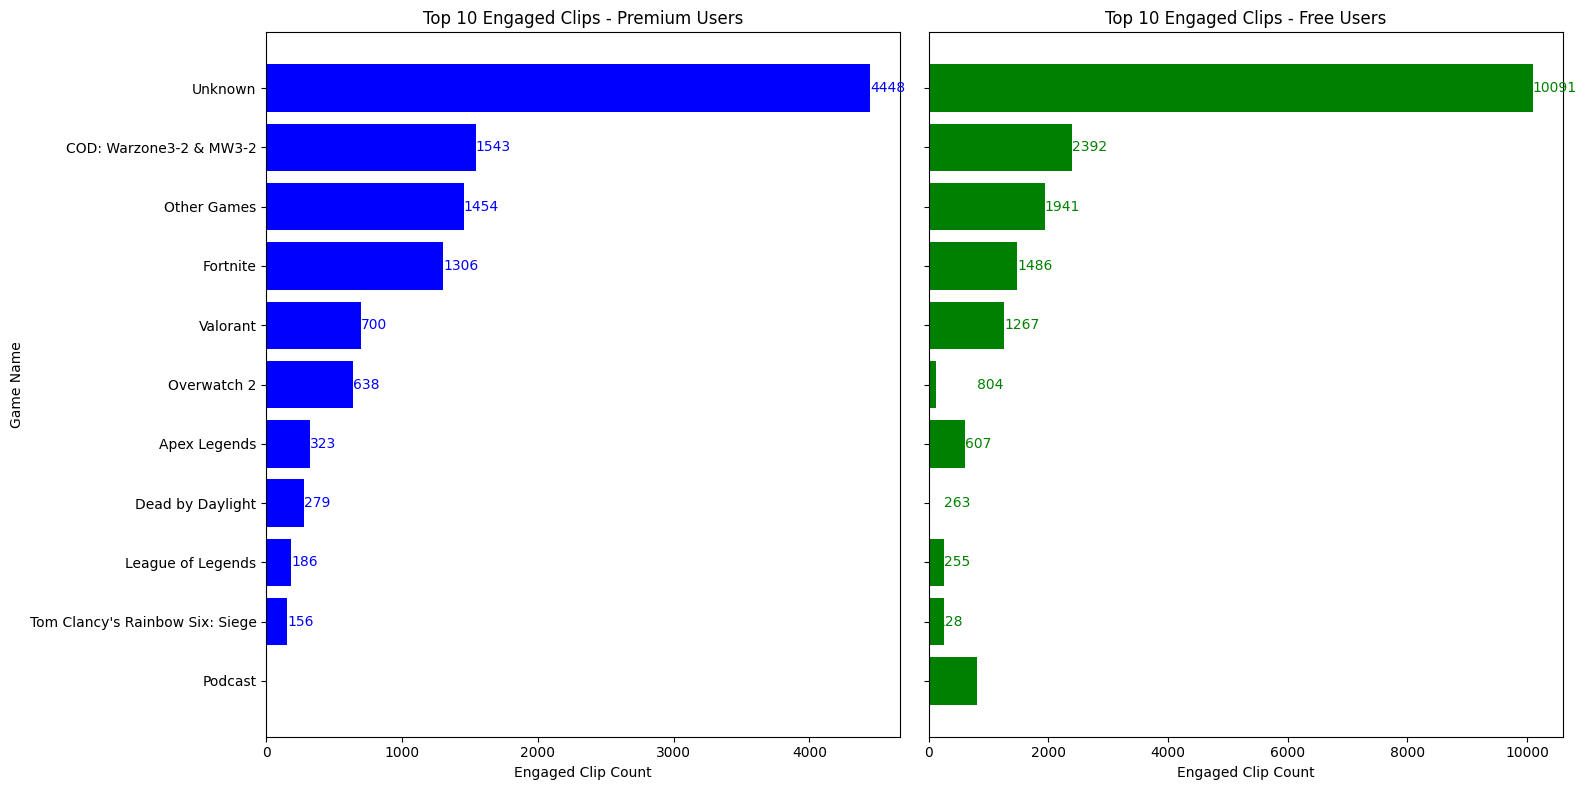

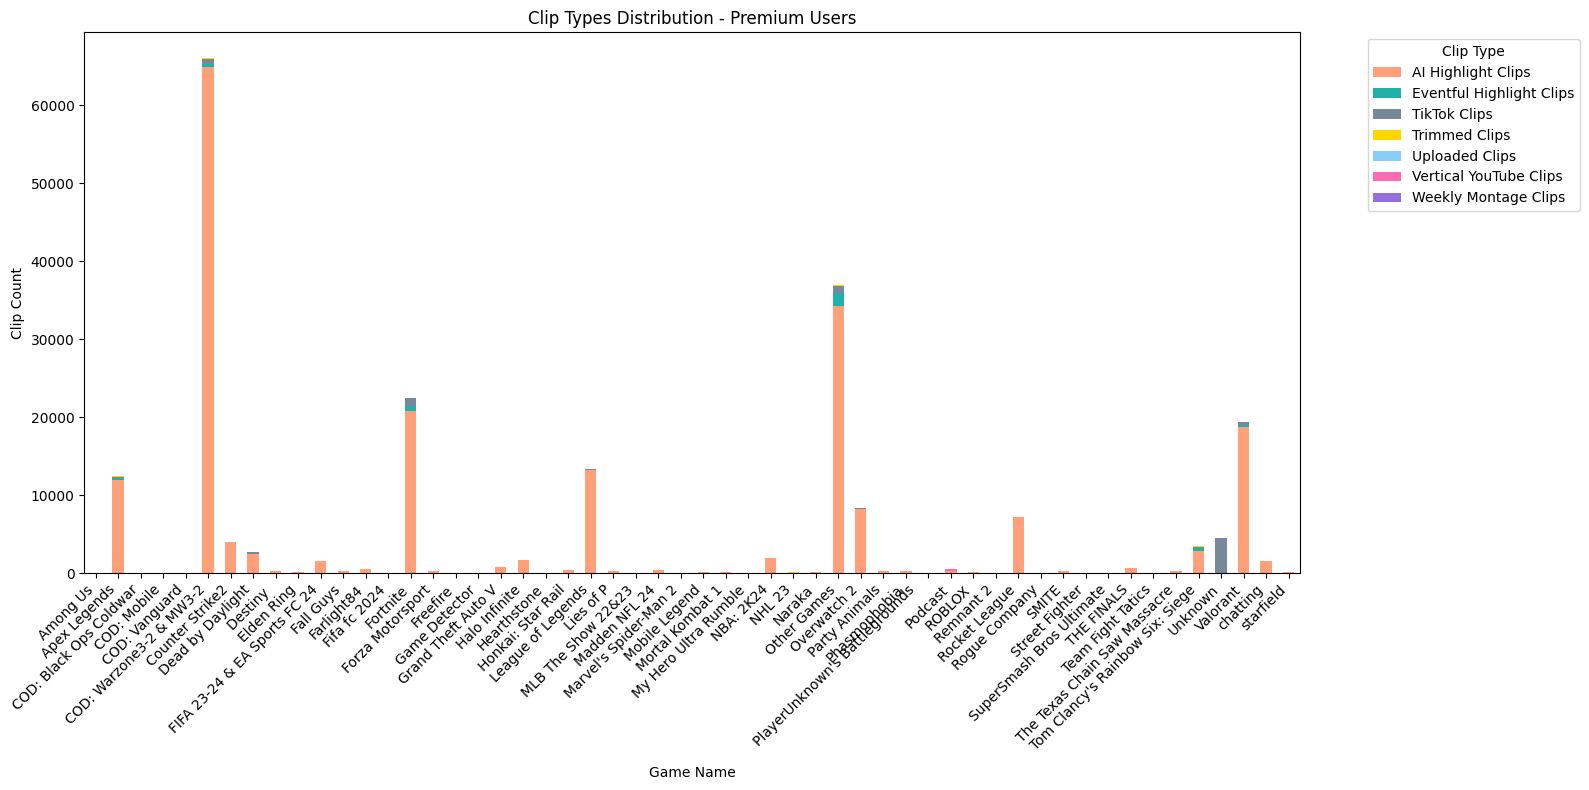

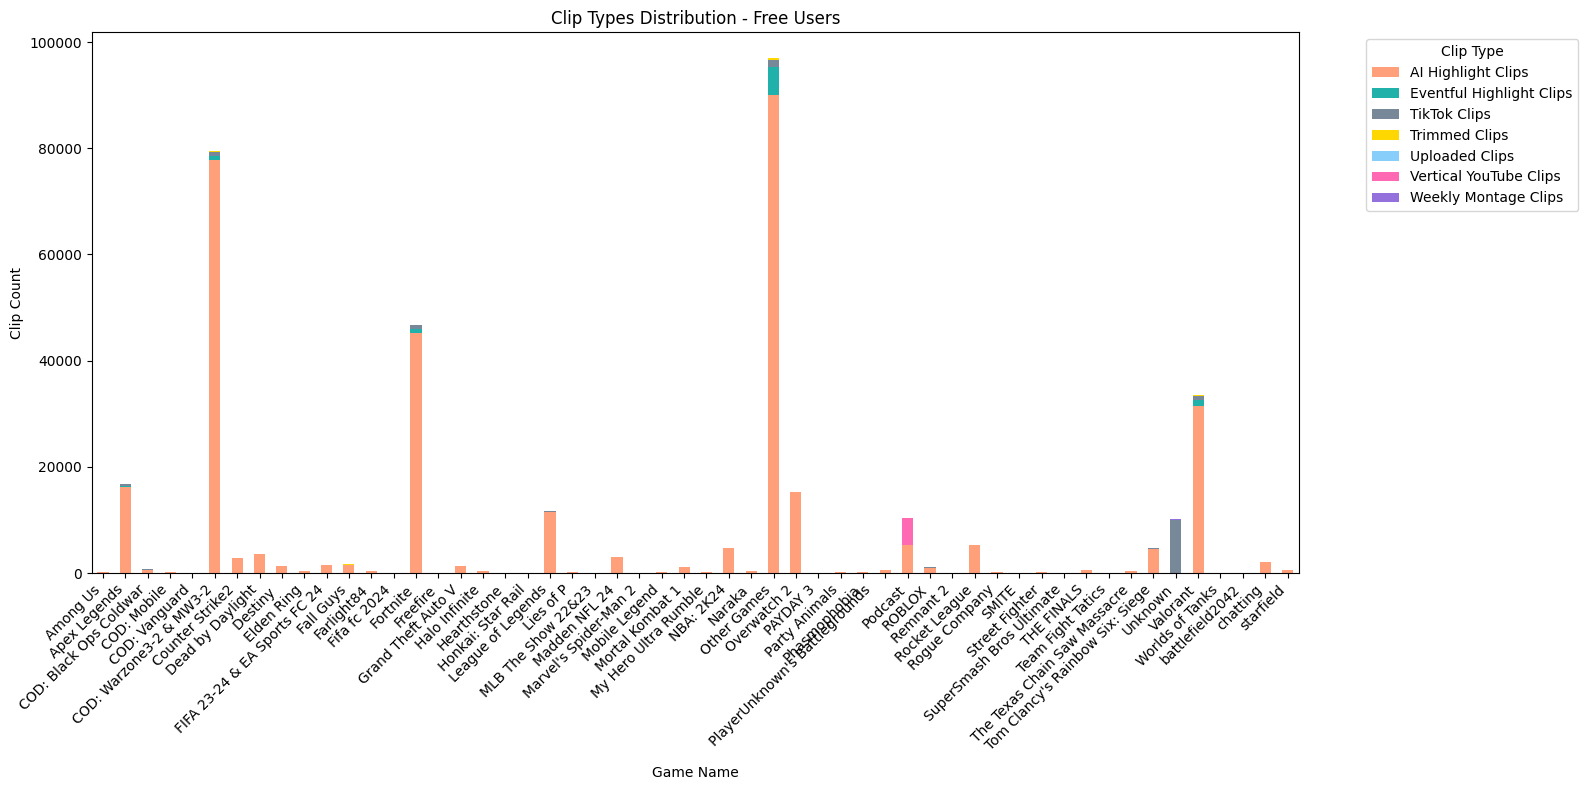

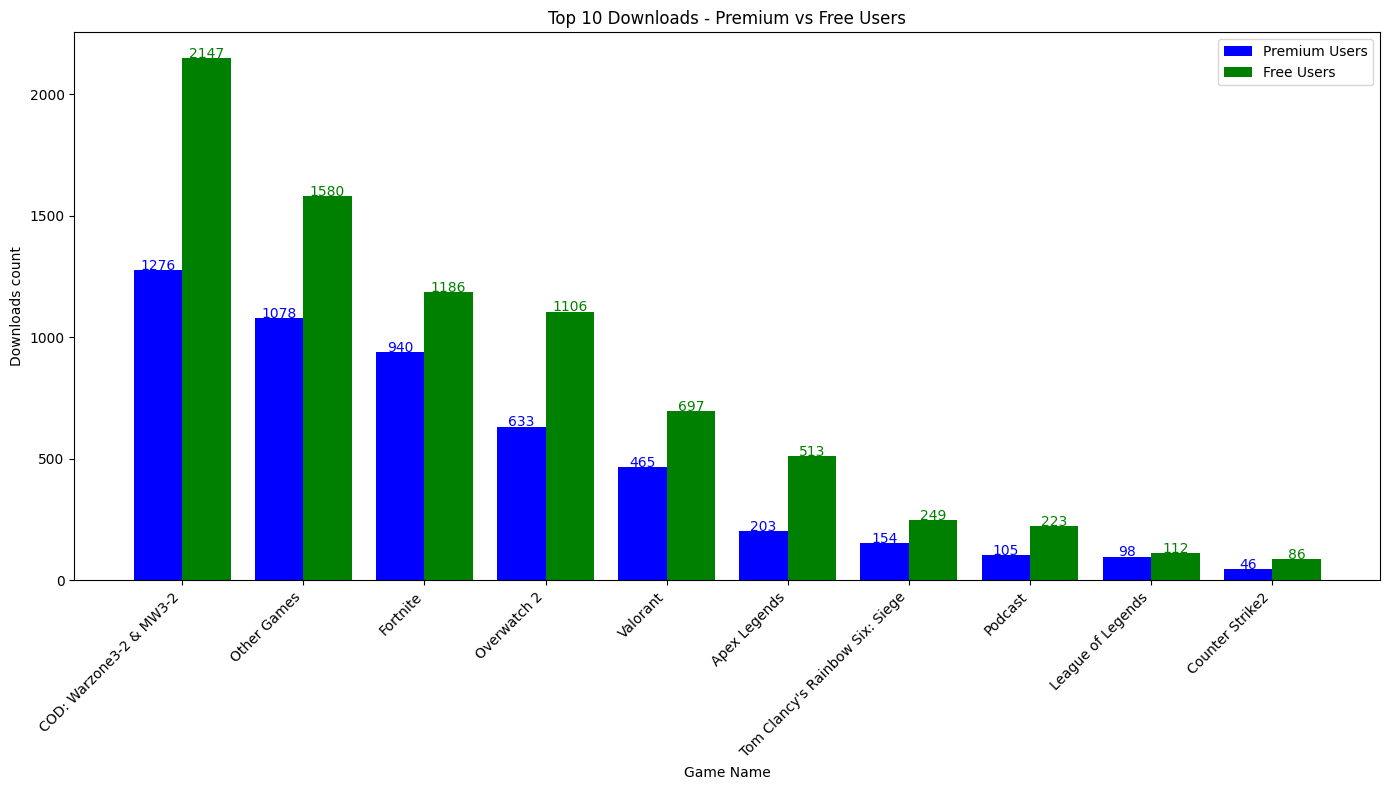

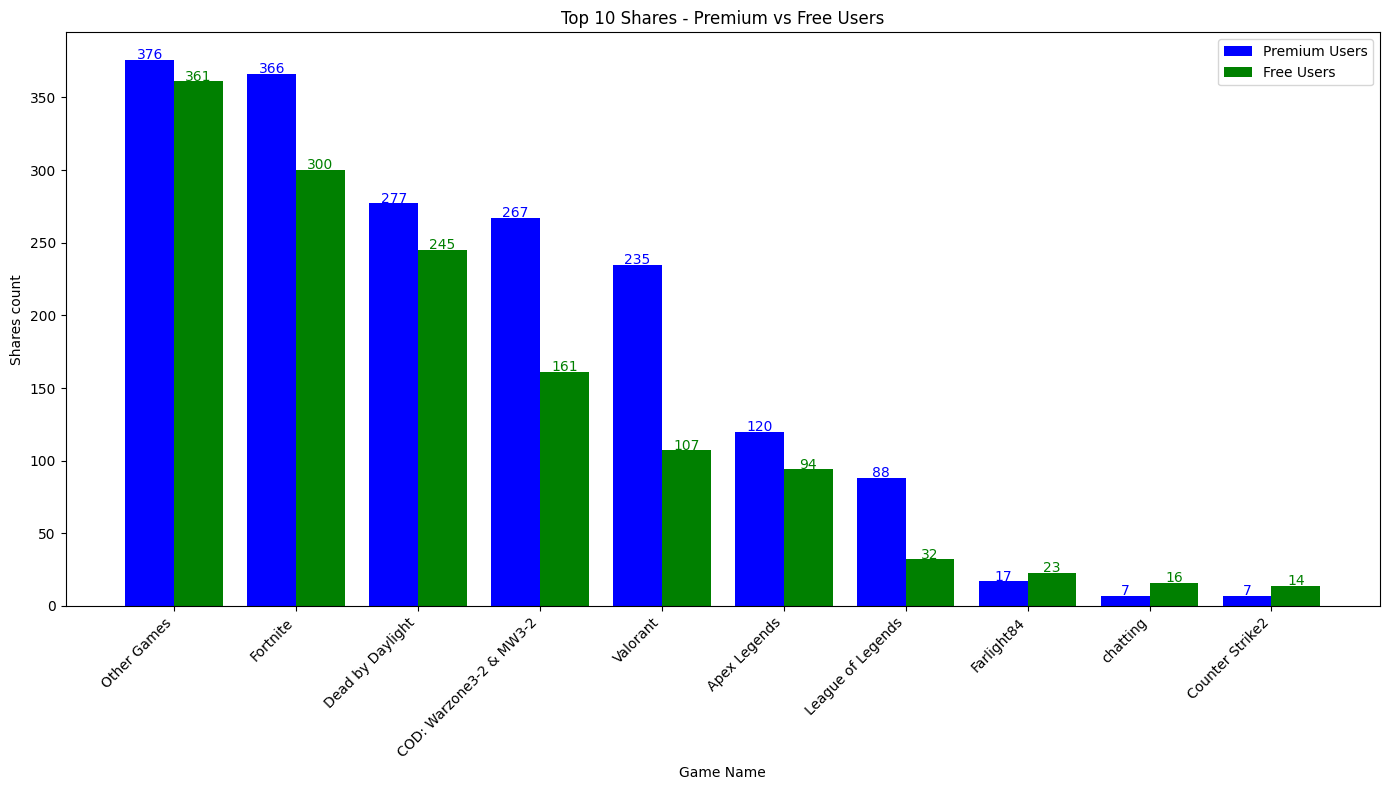

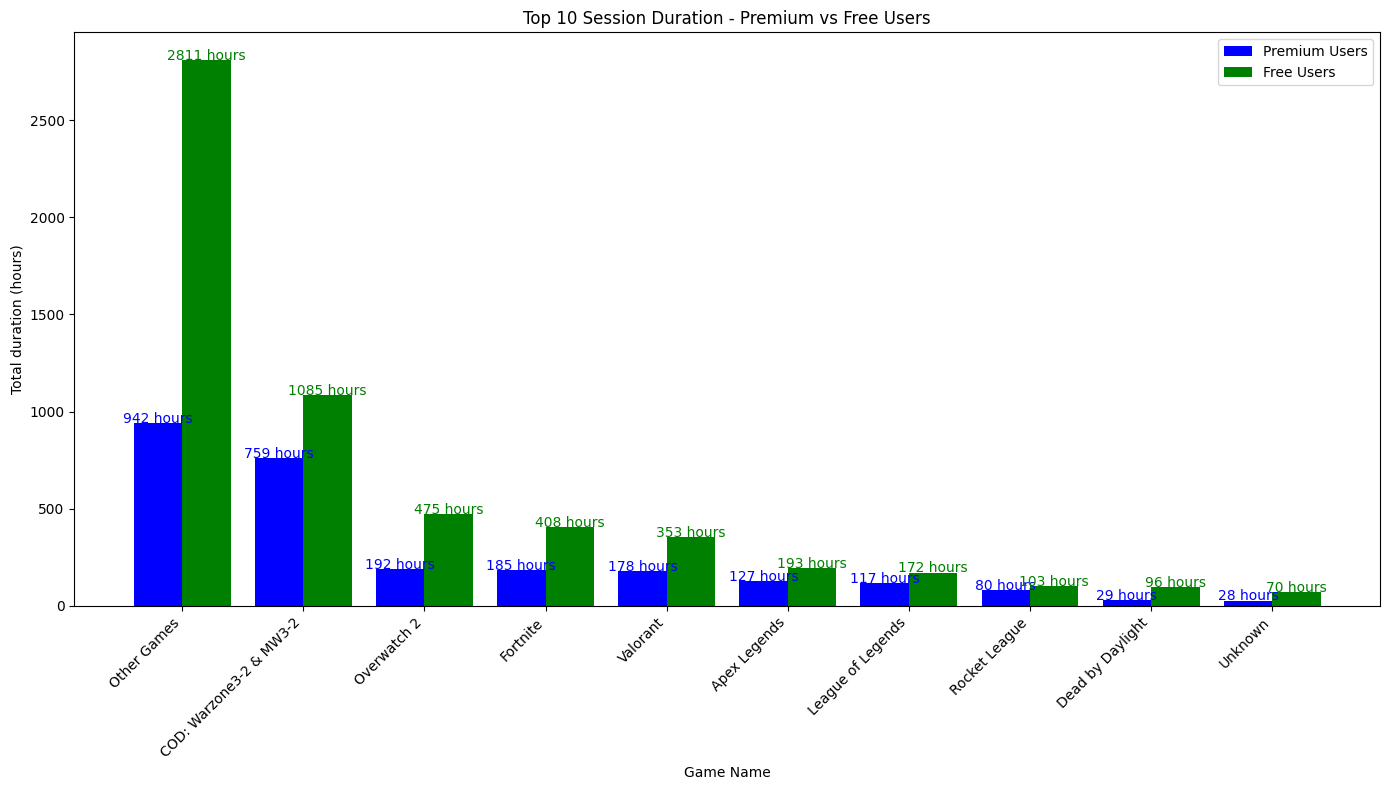

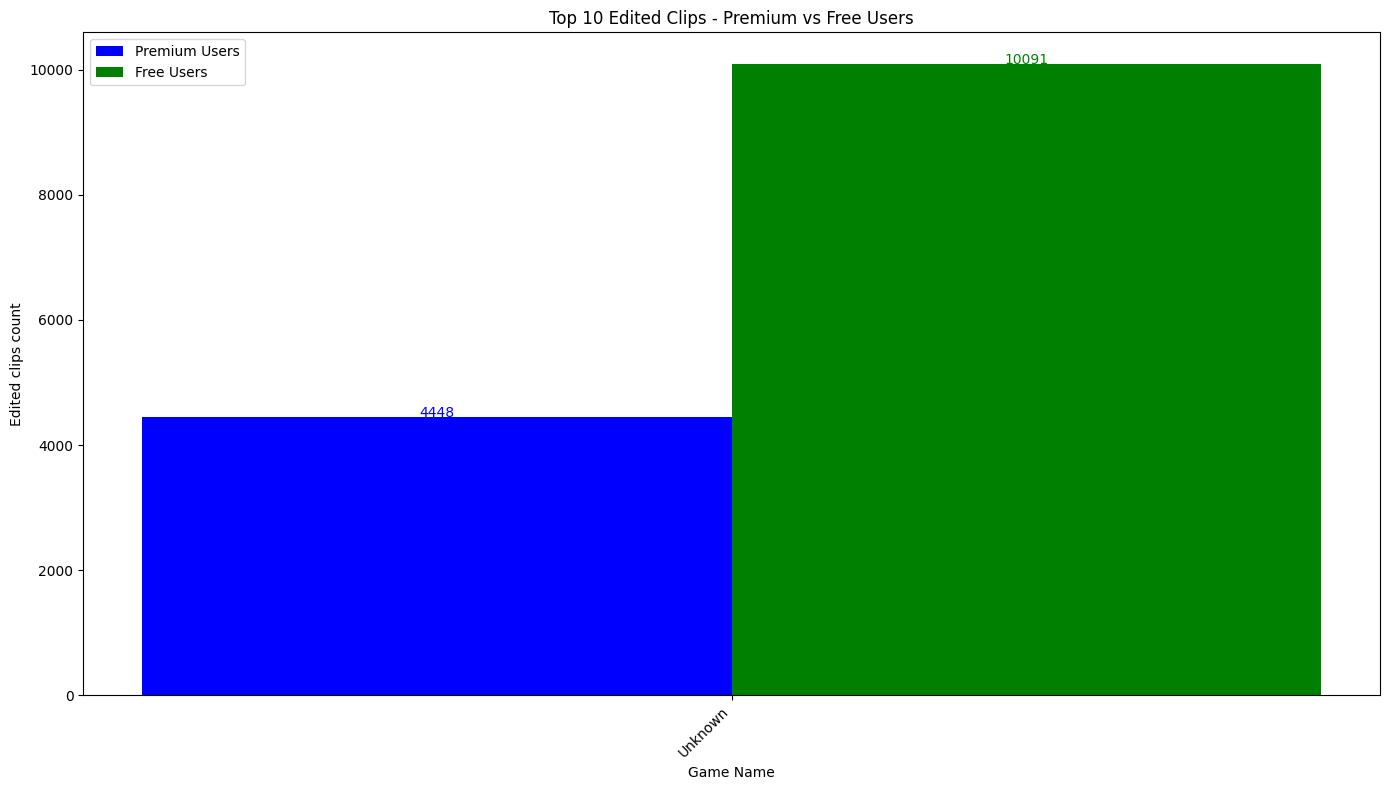

In [16]:
# 1. Engaged Clips by Game
# Visualisasi top 10 engaged clips untuk premium dan free users
def plot_engaged_clips(premium_clips, free_clips):
    fig, ax = plt.subplots(1, 2, figsize=(16, 8), sharey=True)
    
    # Premium Users
    ax[0].barh(premium_clips['game_name'], premium_clips['engaged_clip_count'], color='blue')
    for i, v in enumerate(premium_clips['engaged_clip_count']):
        ax[0].text(v, i, str(v), color='blue', va='center')
    ax[0].set_title('Top 10 Engaged Clips - Premium Users')
    ax[0].set_xlabel('Engaged Clip Count')
    ax[0].set_ylabel('Game Name')
    ax[0].invert_yaxis()
    
    # Free Users
    ax[1].barh(free_clips['game_name'], free_clips['engaged_clip_count'], color='green')
    for i, v in enumerate(free_clips['engaged_clip_count']):
        ax[1].text(v, i, str(v), color='green', va='center')
    ax[1].set_title('Top 10 Engaged Clips - Free Users')
    ax[1].set_xlabel('Engaged Clip Count')
    
    plt.tight_layout()
    plt.show()

# Plot engaged clips
plot_engaged_clips(
    premium_clips.sort_values(by='engaged_clip_count', ascending=False).head(10),
    free_clips.sort_values(by='engaged_clip_count', ascending=False).head(10)
)

# 2. Clip Types by Game
# Visualisasi clip types berdasarkan game
def plot_clip_types(clip_data, title, colors):
    clip_data_pivot = clip_data.pivot(index='game_name', columns='clip_type_name', values='clip_count').fillna(0)
    clip_data_pivot.plot(kind='bar', stacked=True, figsize=(16, 8), color=colors)
    plt.title(title)
    plt.xlabel('Game Name')
    plt.ylabel('Clip Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Clip Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Plot clip types
plot_clip_types(
    premium_clips_by_type,
    title="Clip Types Distribution - Premium Users",
    colors=['#FFA07A', '#20B2AA', '#778899', '#FFD700', '#87CEFA', '#FF69B4', '#9370DB']
)
plot_clip_types(
    free_clips_by_type,
    title="Clip Types Distribution - Free Users",
    colors=['#FFA07A', '#20B2AA', '#778899', '#FFD700', '#87CEFA', '#FF69B4', '#9370DB']
)

# 3. Engagement Metrics Comparison
# Visualisasi downloads, shares, session duration, dan edited clips
def plot_engagement_metrics(premium_data, free_data, metric_name, title, unit_label=""):
    fig, ax = plt.subplots(figsize=(14, 8))
    
    bar_width = 0.4
    x = range(len(premium_data['game_name']))
    
    # Bar for Premium Users
    ax.bar(x, premium_data[metric_name], width=bar_width, color='blue', label='Premium Users')
    for i, v in enumerate(premium_data[metric_name]):
        ax.text(i, v + 0.5, f"{v} {unit_label}".strip(), ha='center', color='blue')
    
    # Bar for Free Users
    ax.bar([p + bar_width for p in x], free_data[metric_name], width=bar_width, color='green', label='Free Users')
    for i, v in enumerate(free_data[metric_name]):
        ax.text(i + bar_width, v + 0.5, f"{v} {unit_label}".strip(), ha='center', color='green')
    
    ax.set_title(title)
    ax.set_xlabel('Game Name')
    ax.set_ylabel(metric_name.replace('_', ' ').capitalize() + (f" ({unit_label})" if unit_label else ""))
    ax.set_xticks([p + bar_width / 2 for p in x])
    ax.set_xticklabels(premium_data['game_name'], rotation=45, ha='right')
    ax.legend()
    
    plt.tight_layout()
    plt.show()

# Plot downloads
plot_engagement_metrics(
    downloads_by_game[downloads_by_game['is_premium'] == True].sort_values(by='downloads_count', ascending=False).head(10),
    downloads_by_game[downloads_by_game['is_premium'] == False].sort_values(by='downloads_count', ascending=False).head(10),
    'downloads_count',
    'Top 10 Downloads - Premium vs Free Users'
)

# Plot shares
plot_engagement_metrics(
    shares_by_game[shares_by_game['is_premium'] == True].sort_values(by='shares_count', ascending=False).head(10),
    shares_by_game[shares_by_game['is_premium'] == False].sort_values(by='shares_count', ascending=False).head(10),
    'shares_count',
    'Top 10 Shares - Premium vs Free Users'
)

# Plot session duration
plot_engagement_metrics(
    session_duration_by_game[session_duration_by_game['is_premium'] == True].sort_values(by='total_duration', ascending=False).head(10),
    session_duration_by_game[session_duration_by_game['is_premium'] == False].sort_values(by='total_duration', ascending=False).head(10),
    'total_duration',
    'Top 10 Session Duration - Premium vs Free Users',
    unit_label="hours"
)

# Plot edited clips
plot_engagement_metrics(
    edited_clips_by_game[edited_clips_by_game['is_premium'] == True].sort_values(by='edited_clips_count', ascending=False).head(10),
    edited_clips_by_game[edited_clips_by_game['is_premium'] == False].sort_values(by='edited_clips_count', ascending=False).head(10),
    'edited_clips_count',
    'Top 10 Edited Clips - Premium vs Free Users'
)

## Suggestions on Whether the Company Should Focus on Specific Games

Here are the recommendations for prioritizing specific games and leveraging the insights to increase engagement and revenue:


### **1. Prioritize High-Engagement Games**
#### **Key Insights**:
- **COD: Warzone3-2 & MW3-2**:
  - High across all metrics:
    - Engaged Clips: 1543 (Premium), 2392 (Free).
    - Downloads: 1276 (Premium), 2147 (Free).
    - Session Duration: 759 hours (Premium), 1085 hours (Free).
    - Clip Types: 64,917 AI Highlight Clips (Premium), 77,793 (Free).
  - Frequent downloads and shares show that this game drives user interest significantly.
  
- **Fortnite**:
  - High across engagement metrics for both user groups:
    - Engaged Clips: 1306 (Premium), 1486 (Free).
    - Downloads: 940 (Premium), 1186 (Free).
    - Session Duration: 185 hours (Premium), 475 hours (Free).
    - TikTok Clips are particularly popular (980 for Premium users).

#### **Suggestions**:
1. **COD: Warzone3-2 & MW3-2**:
   - Promote Premium features such as faster stream processing and TikTok templates targeting Free users already highly engaged.
   - Create targeted ads highlighting the value of Premium tools for editing Warzone highlights.
   
2. **Fortnite**:
   - Leverage TikTok clip popularity to market Premium TikTok templates.
   - Offer personalized promotions like free Premium trials to Free users frequently downloading Fortnite clips.


### **2. Increase Focus on Emerging Games**
#### **Key Insights**:
- **Valorant**:
  - Strong metrics for both user groups:
    - Engaged Clips: 700 (Premium), 1267 (Free).
    - Downloads: 465 (Premium), 1106 (Free).
    - Clip Types: 18,756 AI Highlight Clips (Premium), 31,521 (Free).
    - Session Duration: 178 hours (Premium), 408 hours (Free).

- **Overwatch 2**:
  - Prominent among Premium users:
    - Engaged Clips: 638 (Premium).
    - Downloads: 633 (Premium), 112 (Free).
    - Session Duration: 192 hours (Premium), 353 hours (Free).

#### **Suggestions**:
1. **Valorant**:
   - Highlight AI-driven editing features in campaigns for both Free and Premium users.
   - Use Valorant-specific tutorials and showcases to attract Premium upgrades.

2. **Overwatch 2**:
   - Develop game-specific Premium templates and advanced editing tools.
   - Encourage Free users with longer session durations to upgrade by offering free trials.


### **3. Leverage Unique Game Dynamics**
#### **Key Insights**:
- **Apex Legends**:
  - Moderate engagement:
    - Downloads: 203 (Premium), 513 (Free).
    - Clip Types: 11,880 AI Highlight Clips (Premium), 16,184 (Free).
    - Engaged Clips: 323 (Premium), 607 (Free).
  - High potential among Free users who demonstrate consistent engagement.

- **Dead by Daylight**:
  - High sharing among Premium users (277 shares).
  - Clip engagement and session durations are lower but growing.

#### **Suggestions**:
1. **Apex Legends**:
   - Encourage Premium use with exclusive benefits such as early access to advanced editing tools.
   - Create game-specific campaigns showcasing professional-quality content enabled by Premium.

2. **Dead by Daylight**:
   - Tap into sharing behaviors by promoting collaborative content tools in Premium plans.
   - Offer limited-time perks for Premium sign-ups, targeting players actively sharing clips.


### **4. Address "Other Games" and "Unknown"**
#### **Key Insights**:
- "Other Games":
  - High across engagement metrics (e.g., 1454 engaged clips for Premium users and 1941 for Free users).
- "Unknown":
  - Dominates edited clips (4448 Premium, 10,091 Free).
  - Strong across other metrics, potentially representing games not yet categorized.

#### **Suggestions**:
- **Other Games**:
   - Identify high-engagement titles under this category and create a focused marketing approach.
   - Use analytics to classify popular games and prioritize the most impactful ones.
   
- **Unknown**:
   - Improve tagging and categorization processes to accurately capture game data.
   - Investigate popular behaviors within this category to optimize the platform experience.


### **5. Target Niche Titles with Growing Engagement**
#### **Key Insights**:
- Games like **NBA: 2K24**, **Rocket League**, and **Counter Strike2** are emerging with notable metrics among both user groups.
- These games show growing clip generation and downloads, particularly among Free users.

#### **Suggestions**:
- Focus on niche games like **NBA: 2K24** by introducing game-specific editing templates.
- Use targeted campaigns to capitalize on engagement trends and convert Free users to Premium.

# **Conclusions**

**1. User Behavior Insights**
- Free users exhibit higher **gamesession durations** (6132 hours vs. 2851 hours for Premium) and **clip generation**, but their engagement is constrained by feature limitations.
- Premium users utilize **advanced features** like AI editing and share tools more efficiently, leading to shorter clip durations but higher content quality.

**2. High-Engagement Games**
- **COD: Warzone3-2 & MW3-2** and **Fortnite** dominate across all metrics for both user groups, showcasing their value as platform engagement drivers.
- Emerging games like **Valorant** and **Overwatch 2** show strong metrics, particularly among Premium users, indicating potential for growth.

**3. Content Preferences**
- **AI Highlight Clips** are the most popular clip type across all games and user groups.
- TikTok Clips and montage-making features are underutilized by Free users, presenting an opportunity for promoting Premium plans.

**4. "Other Games" and "Unknown" Categories**
- Significant engagement in these categories highlights a need for better tagging and analytics to refine marketing and feature offerings.

# **Strategic Recommendations**

**1. Drive Premium Conversion**
- Offer **7-day Premium trials** to high-duration Free users to showcase benefits like unlimited downloads and advanced clip editing.
- Launch campaigns like: *“Create professional TikTok clips for Fortnite with Premium templates!”*

**2. Expand High-Engagement Games**
- Prioritize investment in features tailored for **COD: Warzone** and **Fortnite**.
- Develop tutorials and content templates for **Valorant** and **Overwatch 2** to capitalize on growing user bases.

**3. Tap into Emerging Titles**
- Focus on **NBA: 2K24**, **Rocket League**, and **Counter Strike2** with game-specific editing features and promotions targeting engaged Free users.

**4. Improve Tagging and Categorization**
- Refine analytics for "Other Games" and "Unknown" categories to better identify high-engagement titles.
- Develop targeted campaigns once game preferences in these categories are clear.

**5. Gamify Engagement**
- Introduce **reward systems** for Free users who frequently share clips or engage in specific games, offering Premium trials as incentives.
- Launch community challenges (e.g., *“Top 10 Fortnite clips this week earn free Premium access!”*).